In [ ]:
import polars as pl
import matplotlib.pyplot as plt


FILE_PATH = "./processed_small_dataset.csv"

In [10]:
df = pl.read_csv(FILE_PATH)
df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spiritual Level"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [15]:
df["genre_top"]

genre_top
str
"""Hip-Hop"""
"""Hip-Hop"""
"""Hip-Hop"""
"""Pop"""
null
…
"""Rock"""
"""Rock"""
"""Rock"""


In [16]:
genre_counts = df.group_by("genre_top").len().drop_nulls()
genre_counts

genre_top,len
str,u32
"""Jazz""",571
"""Folk""",2803
"""Blues""",110
"""Easy Listening""",24
"""Spoken""",423
…,…
"""International""",1389
"""Pop""",2332
"""Rock""",14182


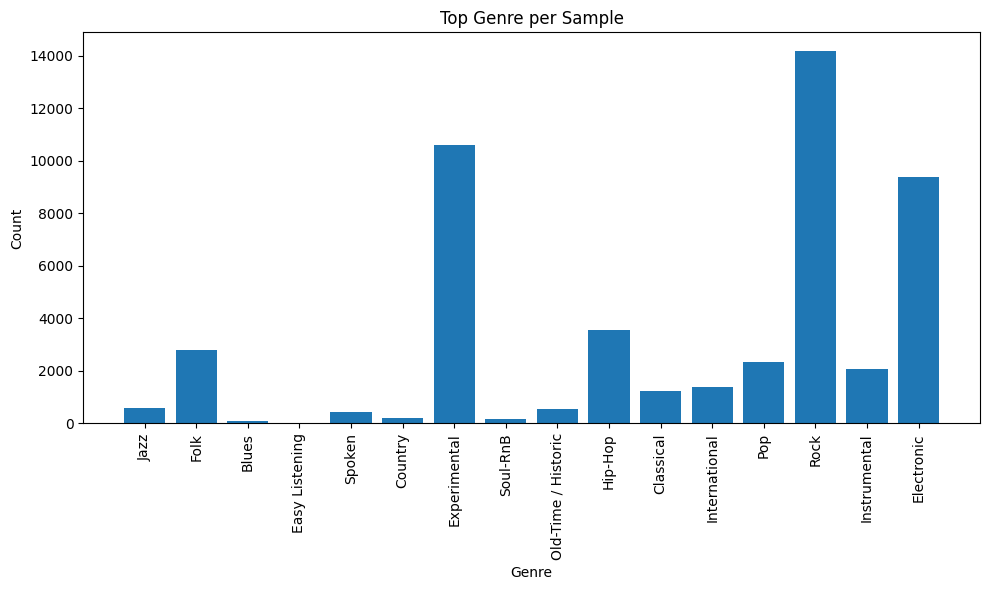

In [18]:
# Extract columns as lists directly from Polars
genres = genre_counts["genre_top"].to_list()
counts = genre_counts["len"].to_list()

# Plot
plt.figure(figsize=(10,6))
plt.bar(genres, counts)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top Genre per Sample")
plt.tight_layout()
plt.show()